<a href="https://colab.research.google.com/github/jessica-zepeda/FinalProjectCSC308/blob/Jessica-changes/BugsLogisticRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [241]:
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
import cv2 as cv
import random

from PIL import Image

import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [224]:
!pip install gdown --quiet 
import gdown
url ='https://drive.google.com/u/0/uc?id=1rmvRzEkRfUavfX2bYy4qNC1Xxoj63JkF'
output ='Bugs.zip'
gdown.download(url,output,quiet=True)

!unzip Bugs.zip
print("Done.")

Archive:  Bugs.zip
replace Bugs/Bugs dogs-vs-cats/Project Proposal.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: Done.


In [225]:
data=pd.read_csv("Bugs/Bugs dogs-vs-cats/labels.csv")

In [226]:
data.label.unique()

array(['bee', 'wasp', 'insect', 'other'], dtype=object)

In [227]:
data.label.value_counts()#we only need bees and wasps.

wasp      4943
bee       3183
insect    2439
other      856
Name: label, dtype: int64

In [228]:
train_path = 'Bugs dogs-vs-cats/train'
valid_path = 'Bugs dogs-vs-cats/valid'
test_path = 'Bugs dogs-vs-cats/test'

In [229]:
data=data[data.id<=8126]
data.label.value_counts()

wasp    4943
bee     3183
Name: label, dtype: int64

In [230]:
data.label.unique()

array(['bee', 'wasp'], dtype=object)

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8126 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   8126 non-null   int64 
 1   path                 8126 non-null   object
 2   is_bee               8126 non-null   int64 
 3   is_wasp              8126 non-null   int64 
 4   is_otherinsect       8126 non-null   int64 
 5   is_other             8126 non-null   int64 
 6   photo_quality        8126 non-null   int64 
 7   is_validation        8126 non-null   int64 
 8   is_final_validation  8126 non-null   int64 
 9   label                8126 non-null   object
dtypes: int64(8), object(2)
memory usage: 698.3+ KB


In [232]:
data.tail(10)#end 10

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
8116,8117,wasp2\W00502.jpg,0,1,0,0,0,0,0,wasp
8117,8118,wasp2\W00503.jpg,0,1,0,0,0,0,0,wasp
8118,8119,wasp2\W00504.jpg,0,1,0,0,0,1,0,wasp
8119,8120,wasp2\W00505.jpg,0,1,0,0,0,0,0,wasp
8120,8121,wasp2\W00506.jpg,0,1,0,0,0,0,0,wasp
8121,8122,wasp2\W00507.jpg,0,1,0,0,0,0,0,wasp
8122,8123,wasp2\W00508.jpg,0,1,0,0,0,0,0,wasp
8123,8124,wasp2\W00509.jpg,0,1,0,0,0,0,1,wasp
8124,8125,wasp2\W00510.jpg,0,1,0,0,0,0,0,wasp
8125,8126,wasp2\W00511.jpg,0,1,0,0,0,0,1,wasp


In [233]:
train_wasp = sorted(os.listdir(train_path +'/wasp'))
train_bee =  sorted(os.listdir(train_path +'/bee'))


test_wasp = sorted(os.listdir(test_path +'/wasp'))
test_bee =  sorted(os.listdir(test_path +'/bee'))

list=["train_wasp","train_bee","test_wasp","test_bee"]

wasp1=0
wasp2=0
bee1=0
bee2=0

for i in train_wasp:
    wasp1=wasp1+1
    
for i in train_bee:
    bee1=bee1+1
    
for i in test_wasp:
    wasp2=wasp2+1
    
for i in test_bee:
    bee2=bee2+1

print("train_wasp :",wasp1)
print("test_wasp :",wasp2)
print("train_bee :",bee1)
print("test_bee :",bee2)

train_wasp : 300
test_wasp : 150
train_bee : 300
test_bee : 150


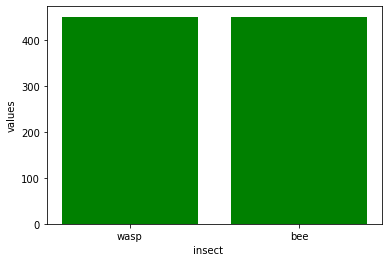

In [234]:
count_wasp =wasp1+wasp2
count_bee=bee1+bee2

list_count=[count_wasp,count_bee]

list_count_veriable =["wasp","bee"]

list=["train_wasp","train_bee","test_wasp","test_bee"]

fig = plt.figure()
plt.bar(list_count_veriable,list_count,color="green")
plt.bar(list_count_veriable,list_count,color="green")
plt.xlabel("insect    ")
plt.ylabel("values")
plt.show()

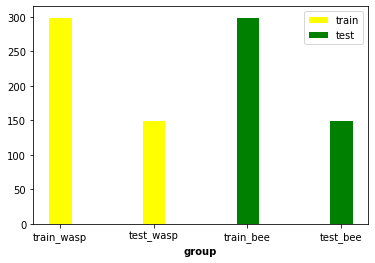

In [235]:
barWidth = 0.25
 
# set height of bar

bars1 = [wasp1,wasp2]
bars2 = [ bee1,bee2]
 

list1=["train_wasp","test_wasp"]
list2=["train_bee","test_bee"]
 
# Make the plot
plt.bar(list1, bars1, color='yellow', width=barWidth, edgecolor='white', label='train')
plt.bar(list2, bars2, color='green', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')

 
# Create legend & Show graphic
plt.legend()
plt.show()

In [236]:
list_img_wasp=[]
x_list_wasp=[]
list_img_bee=[]
x_list_bee=[]

for x in train_wasp:
    x_list_wasp.append(x)
for i in range(1,300):
    list_img_wasp.append(implt.imread(train_path +'/wasp/'+x_list_wasp[i]))

for y in train_bee:
    x_list_bee.append(y)
for a in range(1,300):
    list_img_bee.append(implt.imread(train_path +'/bee/'+x_list_bee[a]))

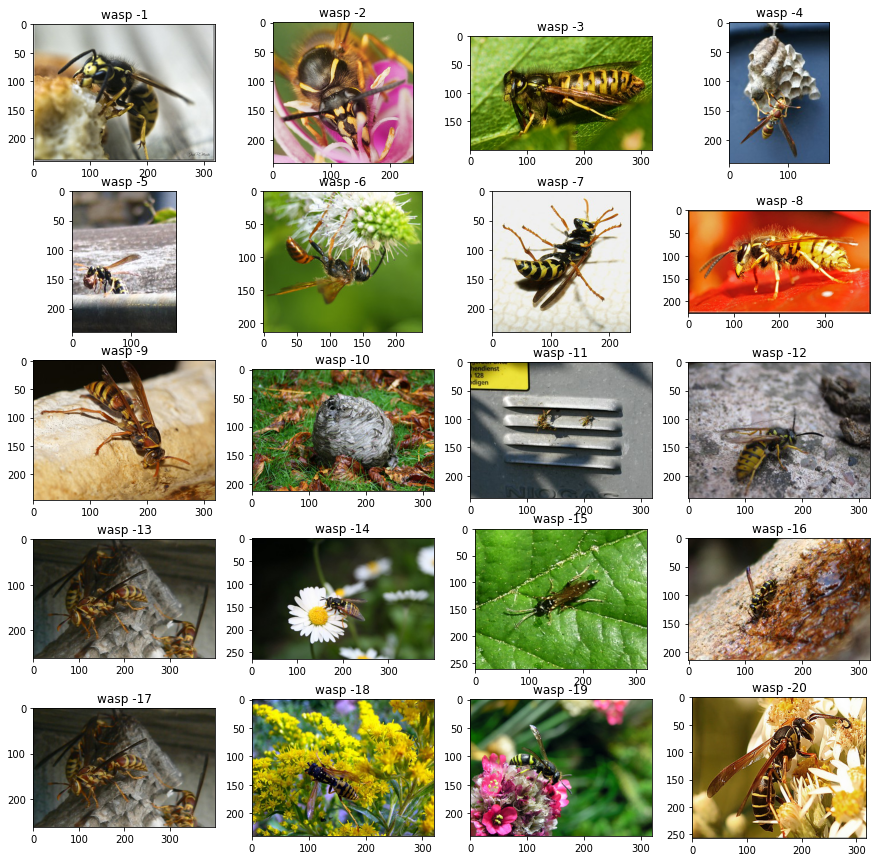

In [237]:
#random wasp images
w=10
h=10
fig=plt.figure(figsize=(15,15))
columns = 4
rows = 5
for i in range(1,21):
    img = np.random.randint(300, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(list_img_wasp[random.randint(1,300)])#random values
    converted_num = str(i) 
    plt.title("wasp -"+converted_num)
    i=int(i)
    
plt.show()

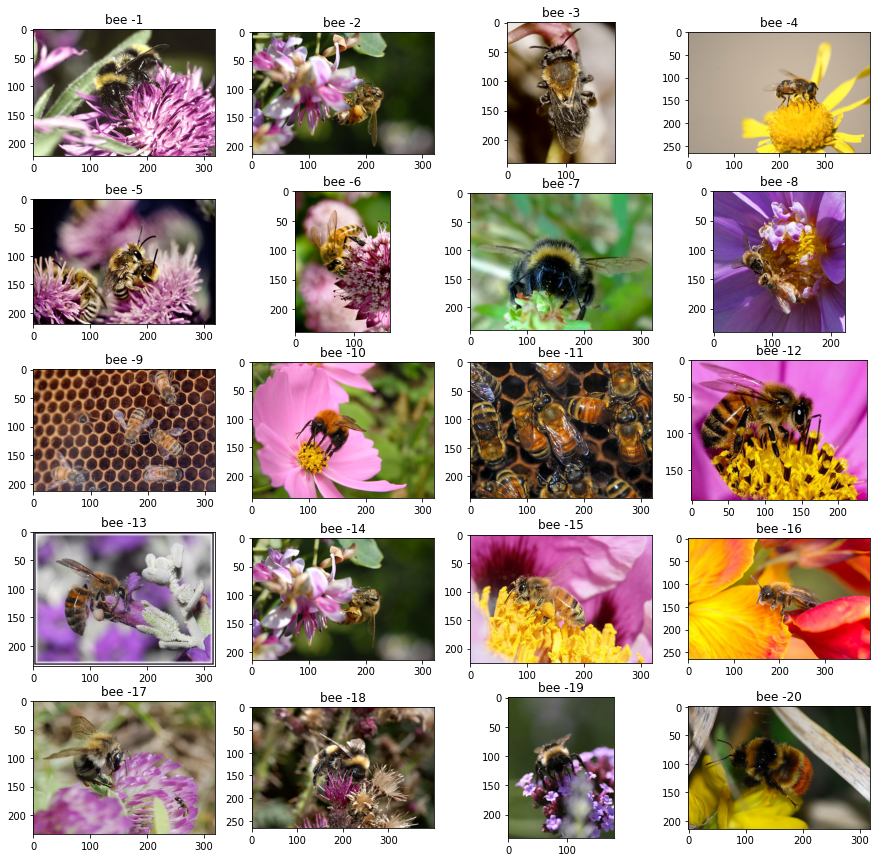

In [238]:
#random bee images

w=10
h=10
fig=plt.figure(figsize=(15,15))
columns = 4
rows = 5

for i in range(1,21):
    
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(list_img_bee[random.randint(1,300)])
    converted_num = str(i) 
    plt.title("bee -"+converted_num)
    i=int(i)
    
plt.show()

In [239]:
img_size = 50
wasp_insect = []
bee_insect = [] 
label = []

for i in train_wasp:
    if os.path.isfile(train_path +'/wasp/'+ i):
        insect = Image.open(train_path +'/wasp/'+ i).convert('L') #converting grey scale            
        insect = insect.resize((img_size,img_size), Image.ANTIALIAS) #resizing to 50,50
        insect = np.asarray(insect)/255.0 #normalizing images
        wasp_insect.append(insect)  
        label.append(1) #label 1 for women
           
        
for i in train_bee:
    if os.path.isfile(train_path +'/bee/'+ i):
        insect = Image.open(train_path+'/bee/'+ i).convert('L')
        insect = insect.resize((img_size,img_size), Image.ANTIALIAS)
        insect = np.asarray(insect)/255.0 #normalizing images
        bee_insect.append(insect)  
        label.append(0) #label 0 for men

        
x_train = np.concatenate((wasp_insect,bee_insect),axis=0) # training dataset
x_train_label = np.asarray(label)# label array containing 0 and 1
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("wasp_insect:",np.shape(wasp_insect) , "bee_insect:",np.shape(bee_insect))
print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

wasp_insect: (300, 50, 50) bee_insect: (300, 50, 50)
train_dataset: (600, 50, 50) train_values: (600, 1)


In [242]:
img_size = 50
wasp_insect = []
bee_insect = [] 
label = []


for i in test_wasp:
        if os.path.isfile(test_path +'/wasp/'+ i):
            insect = Image.open(test_path +'/wasp/'+ i).convert('L')            
            insect = insect.resize((img_size,img_size), Image.ANTIALIAS)
            insect = np.asarray(insect)/255.0
            wasp_insect.append(insect)  
            label.append(1)     

for i in test_bee:
        if os.path.isfile(test_path+'/bee/'+ i):
            faces = Image.open(test_path+'/bee/'+ i).convert('L')
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0            
            bee_insect.append(faces)
            label.append(0)                       

x_test = np.concatenate((wasp_insect,bee_insect),axis=0) # test dataset
x_test_label = np.asarray(label) # corresponding labels
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)

print("wasp_insect:",np.shape(wasp_insect), "bee_insect:",np.shape(bee_insect))
print("test_dataset:",np.shape(x_test), "test_values:",np.shape(x_test_label))

wasp_insect: (150, 50, 50) bee_insect: (150, 50, 50)
test_dataset: (300, 50, 50) test_values: (300, 1)


In [243]:
x = np.concatenate((x_train,x_test),axis=0) #train_data
y = np.concatenate((x_train_label,x_test_label),axis=0) #test data
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) #flatten 3D image array to 2D
print("images:",np.shape(x), "labels:",np.shape(y))

images: (900, 2500) labels: (900, 1)


In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("train number:",number_of_train, "test number:",number_of_test)

train number: 720 test number: 180


In [245]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2500, 720)
x test:  (2500, 180)
y train:  (1, 720)
y test:  (1, 180)


Logistic Regression

In [246]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [247]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [248]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b    
    y_head = sigmoid(z)    
    loss = -(1-y_train)*np.log(1-y_head)-y_train*np.log(y_head)        
    cost = (np.sum(loss))/x_train.shape[1]  # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                   # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [249]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 50 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [250]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is woman (y_head=1),
    # if z is smaller than 0.5, our prediction is man (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 5.931049
Cost after iteration 50: 0.675434


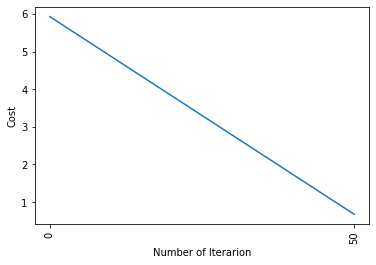

train accuracy: % 62.64
test accuracy: % 60.0


In [251]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # 2500
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    train_acc_lr = round((100 - np.mean(np.abs(y_prediction_train - y_train)) * 100),2)
    test_acc_lr = round((100 - np.mean(np.abs(y_prediction_test - y_test)) * 100),2)
    # Print train/test Errors
    print("train accuracy: %", train_acc_lr)
    print("test accuracy: %", test_acc_lr)
    return train_acc_lr, test_acc_lr
    

train_acc_lr, test_acc_lr = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 100)#There is little change in the graph after this point(100).

In [252]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.5 
train accuracy: 0.9944444444444445 


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
test_acc_logregsk = round(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)* 100, 2)
train_acc_logregsk = round(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)* 100, 2)